# mESC analysis using Cyclum with Manual Tuning

We still use the mESC dataset. For simplicity we have converted the dataset into TPM.
The original count data is available at ArrayExpress: [E-MTAB-2805](https://www.ebi.ac.uk/arrayexpress/experiments/E-MTAB-2805/). Tools to transform data are also provided and explained in the following sections.

## Import necessary packages

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

In [2]:
import pandas as pd
import numpy as np
import sklearn as skl

In [3]:
import cyclum.tuning
import cyclum.models
from cyclum import writer


Using TensorFlow backend.


## Read data
Here we have label, so we load both. However, the label is not used until evaluation.

In [4]:
input_file_mask = '/home/shaoheng/Documents/data/mESC/mesc-tpm'

def preprocess(input_file_mask):
    """
    Read in data and perform log transform (log2(x+1)), centering (mean = 1) and scaling (sd = 1).
    """
    tpm = writer.read_df_from_binary(input_file_mask).T
    sttpm = pd.DataFrame(data=skl.preprocessing.scale(np.log2(tpm.values + 1)), index=tpm.index, columns=tpm.columns)
    
    label = pd.read_csv(input_file_mask + '-label.txt', sep="\t", index_col=0).T
    return sttpm, label

sttpm, label = preprocess(input_file_mask)

In [5]:
sttpm.shape

(288, 38293)

There is no convention whether cells should be columns or rows. Here we require cells to be rows.

## Set up the model and fit the model

In [6]:
model = cyclum.tuning.CyclumAutoTune(sttpm, max_linear_dims=10, 
                                     epochs=500, rate=2e-4, verbose=100,
                                     encoder_width=[30, 20])

Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


epoch: 100/500, loss:  0.7171, time elapsed:  50.55s, time left:  202.18s
epoch: 200/500, loss:  0.7104, time elapsed:  81.93s, time left:  122.90s
epoch: 300/500, loss:  0.7074, time elapsed:  112.68s, time left:  75.12s
epoch: 400/500, loss:  0.7055, time elapsed:  143.42s, time left:  35.86s
epoch: 500/500, loss:  0.7050, time elapsed:  174.08s, time left:  0.00s
[0.7049628098805746]
[0.6834711496280971, 0.6739115526614258, 0.6668002316890194, 0.6607520174763021, 0.6550228138803076, 0.6501494352830828, 0.6453653367384393, 0.640792546893583, 0.6363291922697452, 0.6323095369969642, 0.6285805831366462, 0.6250562626336496]
    1 linear dimensions...
epoch: 100/500, loss:  0.6773, time elapsed:  31.95s, time left:  127.81s
epoch: 200/500, loss:  0.6737, 

## Elbow plot
It is clear in this graph that adding the circular component to one linear component decreases the loss the most.

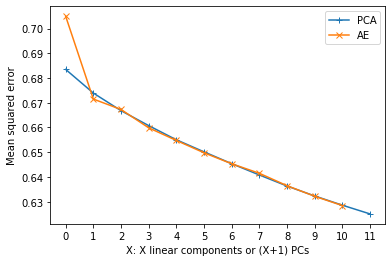

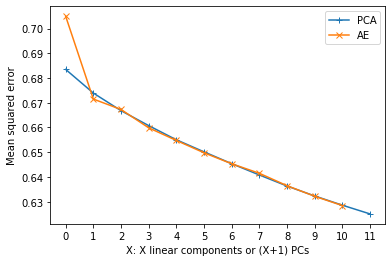

In [7]:
model.show_elbow()

## Bar plot
It is clear in this graph that adding the circular component to one linear component decreases the loss the most.

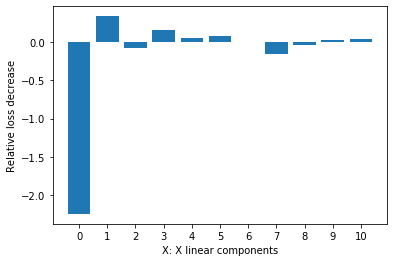

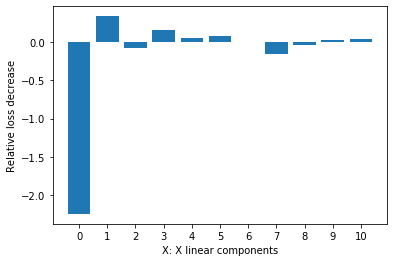

In [8]:
model.show_bar()
